<img src="../img/hu-logo.png" align="right" width="120">

# ROC curve vs. PR curve

## Background 

Key metrics
- Precision = TP / PP = fraction of correctly predicted positives
- Recall = True Positive Rate = Sensitivity = TP / CP = fraction of recovered positives
- False Positive Rate = FP / CN

with 
- TP = true positive
- FP = false positive
- CP = condition positive
- CN = condition negative

<img src="../img/precision-recall.png" width=600>

## ROC curve

- Threshold agnostic evaluation of model quality
- Illustrates trade-off between true positive and false positive rates

## Precision-recall curve

- Looking at both precision and recall is useful when dealing with imbalanced data sets: many 0's $\rightarrow$ TNR less relevant
- Precision and recall are not based on true negatives

For addition details, see
- [A critical investigation of recall and precision as measures of retrieval system performance](https://dl.acm.org/citation.cfm?id=65945)
- [The Relationship Between Precision-Recall and ROC Curves](https://dl.acm.org/citation.cfm?id=1143874)
- [ROC Graphs: Notes and Practical Considerations for Data Mining Researchers](http://www.blogspot.udec.ugto.saedsayad.com/docs/ROC101.pdf)

Link to F1 score: The F1 score summarizes model skill for a specific probability threshold, whereas AUC evaluates the model's quality across thresholds.

## When ROC vs. PRC?

Use ROC curves for balanced data sets, and PR curves for imbalanced data sets.  Consider two examples.

## Examples

In [1]:
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection

In [2]:
plt.rcParams.update(
    {
        "figure.figsize": (10, 8),
        "axes.titlesize": 20,
        "axes.labelsize": 15,
        "legend.fontsize": 15,
        "axes.grid": True,
        "axes.axisbelow": True,
        "pcolor.shading": "auto",
    }
)

## Balanced data

In [3]:
def generate_data(N, weights=[0.5, 0.5]):
    X, y = sklearn.datasets.make_classification(
        n_samples=N, n_classes=2, weights=weights, random_state=1
    )
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
        X, y, test_size=0.5, random_state=2
    )
    # fit a model and predict test probabilities
    model = sklearn.linear_model.LogisticRegression(solver="lbfgs")
    model.fit(X_train, y_train)
    yhat = model.predict_proba(X_test)[:, 1]
    return y_test, yhat

In [4]:
y, yhat = generate_data(1_000)

In [5]:
def plot_roc(y, yhat):
    fpr, tpr, _ = sklearn.metrics.roc_curve(y, yhat)
    plt.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
    plt.plot(fpr, tpr, marker=".", label="Logistic")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"ROC Curve (AUC={sklearn.metrics.auc(fpr, tpr):.4f})")
    plt.legend()
    plt.show()

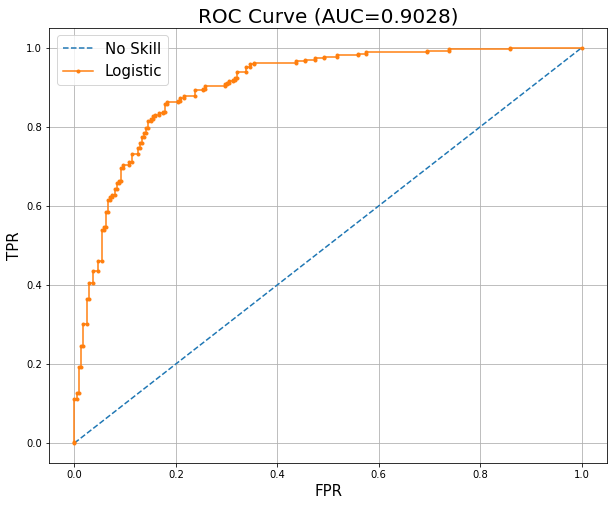

In [6]:
plot_roc(y, yhat)

In [7]:
def plot_prc(y, yhat):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(y, yhat)
    no_skill = len(y[y == 1]) / len(y)
    plt.plot([0, 1], [no_skill, no_skill], linestyle="--", label="No Skill")
    plt.plot(recall, precision, marker=".", label="Logistic")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"ROC Curve (AUC={sklearn.metrics.auc(recall, precision):.4f})")
    plt.legend()
    plt.show()

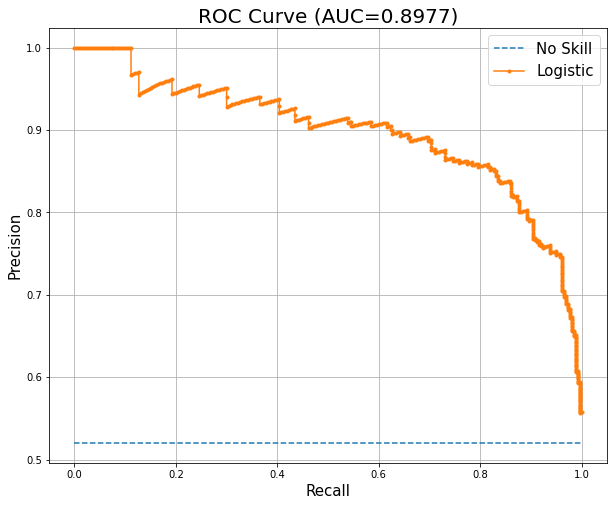

In [8]:
plot_prc(y, yhat)

## Imbalanced data

In [9]:
y, yhat = generate_data(1_000, [0.97, 0.03])

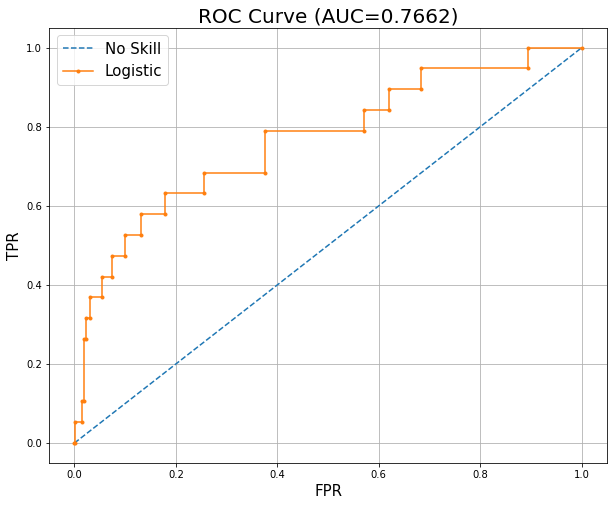

In [10]:
plot_roc(y, yhat)

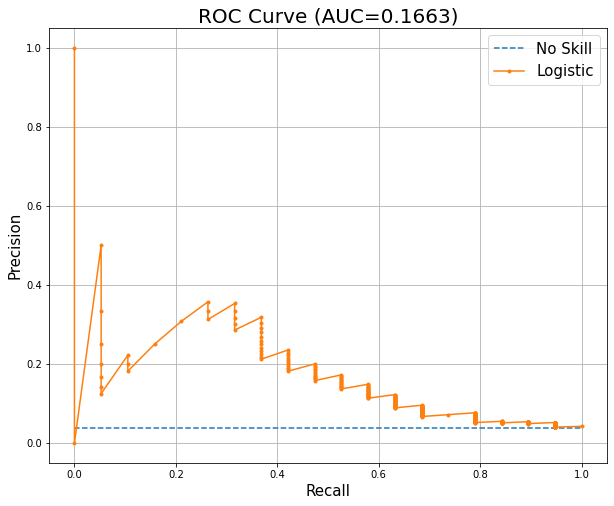

In [11]:
plot_prc(y, yhat)

<br>

&mdash; <br>
Dr. Sebastian Gabel <br>
Machine Learning in Marketing &ndash; Exercise 07 <br>
2020